In [ ]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.models import load_model
from utils.loss import dice_coef_loss, dice_coef
from utils.pre_processing import normalize

In [ ]:
model_path = ''
valid_tumor_path = ''
valid_label_path = ''
image_shape = 128

In [ ]:
model = load_model(model_path, custom_objects={'dice_coef_loss' : dice_coef_loss , 'dice_coef' : dice_coef})

In [ ]:
# load 1 image to test the result

test_number =22
nib_image = nib.load(valid_tumor_path+os.listdir(valid_tumor_path)[test_number]).get_fdata()
nib_label = nib.load(valid_label_path+os.listdir(valid_label_path)[test_number]).get_fdata()

nib_image_input = nib_image.reshape((1,image_shape,image_shape,image_shape,1))
test1 = model.predict(normalize(nib_image_input))
test1_cube = test1.reshape((image_shape,image_shape,image_shape))

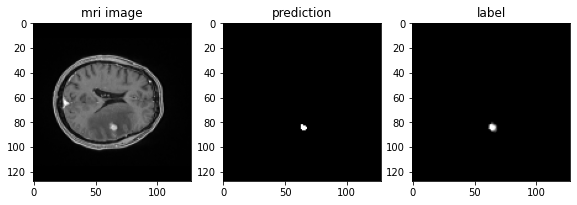

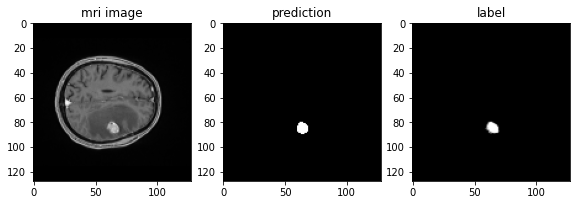

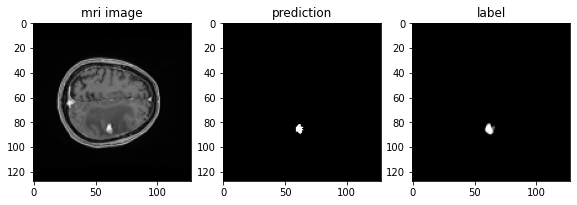

In [27]:
slice_num = 80
for i in range(3):
    
    fig = plt.figure(i, figsize=(30,15))
    
    mri_image = plt.subplot(i+1,9,1)
    mri_image.title.set_text('mri image')
    plt.imshow(nib_test[:,:,slice_num+5*i], cmap='gray')
    
    predict_image = plt.subplot(i+1,9,2)
    predict_image.title.set_text('prediction')
    plt.imshow(test1_cube[:,:,slice_num+5*i]>=1, cmap='gray')
    
    label_image = plt.subplot(i+1,9,3)
    label_image.title.set_text('label')
    plt.imshow(nib_label[:,:,slice_num+5*i], cmap='gray')